In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Attrition data.csv to Attrition data.csv


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Attrition data.csv')
print(data.head())

   EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  ...  \
0                 6          2  Life Sciences              1  Female  ...   
1                10          1  Life Sciences              1  Female  ...   
2                17          4          Other              1    Male  ...   
3                 2          5  Life Sciences              1    Male  ...   
4                10          1        Medical              1    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0     

In [ ]:
# Get basic information about the dataset
print(data.info())

# Statistical summary
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
data.isnull().sum()

,0
EmployeeID,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
Gender,0


In [ ]:
# ffill the missing data
data_filled = data.ffill()
data_filled.isnull().sum()

,0
EmployeeID,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
Gender,0


In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  total employee count
total_employee_count = data['EmployeeID'].nunique() #Apply nunique to the Dataframe column
print(f'Total Employee Count: {total_employee_count}')

#attrition count
attrition_count = data[data['Attrition'] == 'Yes']['EmployeeID'].count()
print(f'Attrition Count: {attrition_count}')

#attrition rate
attrition_rate = (attrition_count / total_employee_count) * 100
print(f'Attrition Rate: {attrition_rate:.2f}%')

#average monthly income
average_monthly_income = data['MonthlyIncome'].mean()
print(f'Average Monthly Income: ${average_monthly_income:.2f}')


Total Employee Count: 4410
Attrition Count: 711
Attrition Rate: 16.12%
Average Monthly Income: $65029.31


In [ ]:
# Feature  selection
# Selecting relevant features for the model
features = data[['Age', 'JobSatisfaction', 'MonthlyIncome', 'YearsAtCompany']]
target = data['Attrition']

<ipython-input-13-97bf1d92505c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_department.index, y=attrition_rate_by_department.values, palette='viridis')


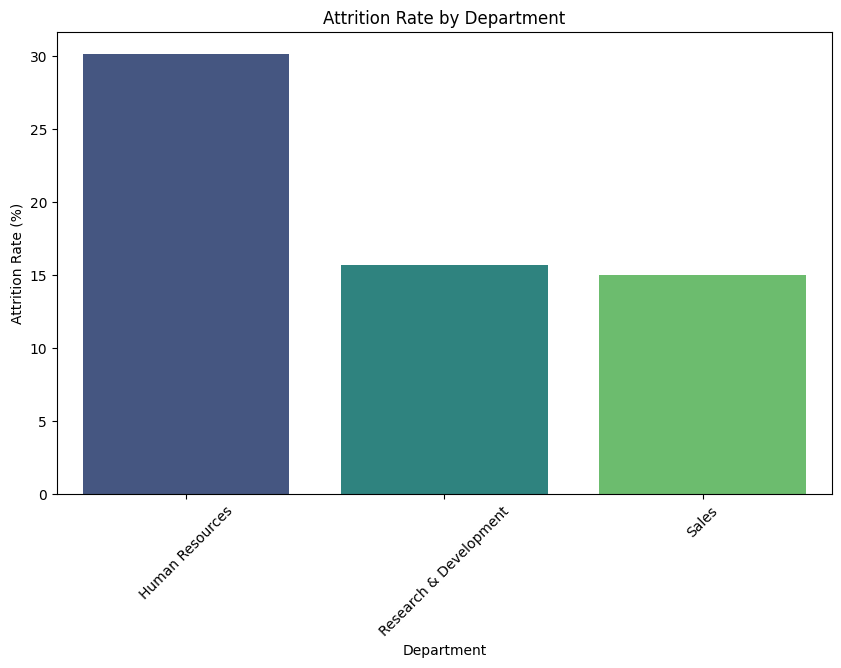

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the attrition count by department
attrition_by_department = data[data['Attrition'] == 'Yes'].groupby('Department')['EmployeeID'].count()

# Total employees by department
total_by_department = data.groupby('Department')['EmployeeID'].count()

# Calculate attrition rate by department
attrition_rate_by_department = (attrition_by_department / total_by_department) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_department.index, y=attrition_rate_by_department.values, palette='viridis')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-14-de027c212dfb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_job_role.index, y=attrition_rate_by_job_role.values, palette='coolwarm')


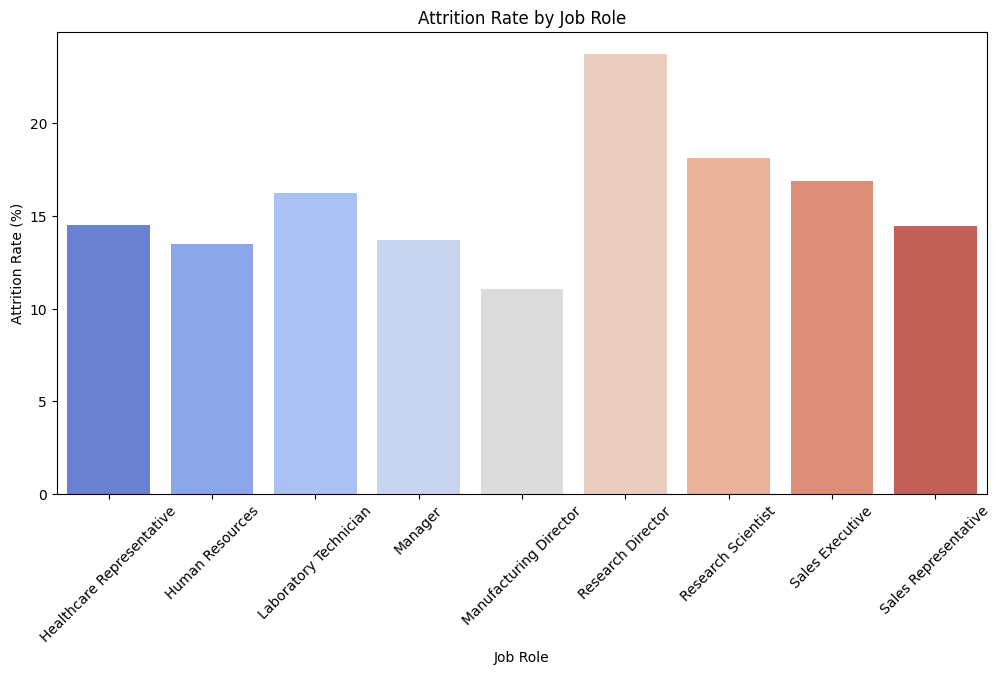

In [ ]:
# Calculate the attrition count by job role
attrition_by_job_role = data[data['Attrition'] == 'Yes'].groupby('JobRole')['EmployeeID'].count()

# Total employees by job role
total_by_job_role = data.groupby('JobRole')['EmployeeID'].count()

# Calculate attrition rate by job role
attrition_rate_by_job_role = (attrition_by_job_role / total_by_job_role) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attrition_rate_by_job_role.index, y=attrition_rate_by_job_role.values, palette='coolwarm')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


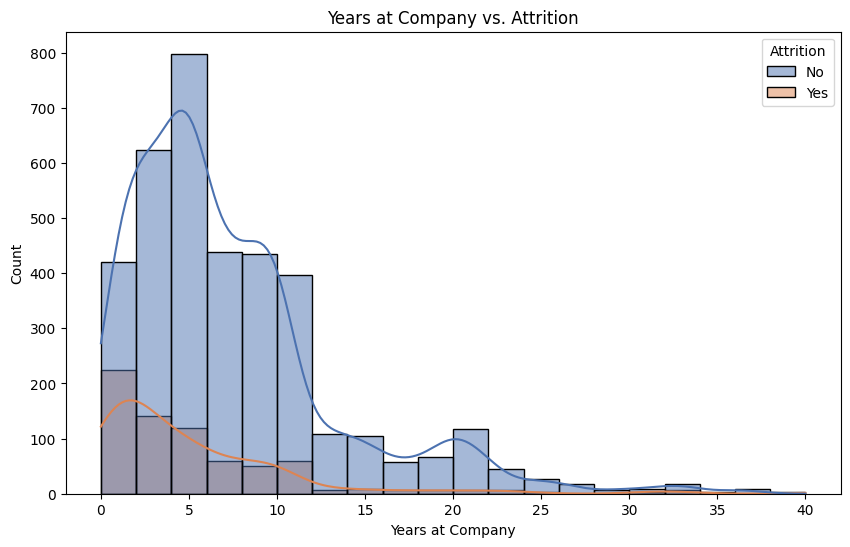

In [ ]:
# Plot years at company vs. attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', kde=True, palette='deep', bins=20)
plt.title('Years at Company vs. Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()


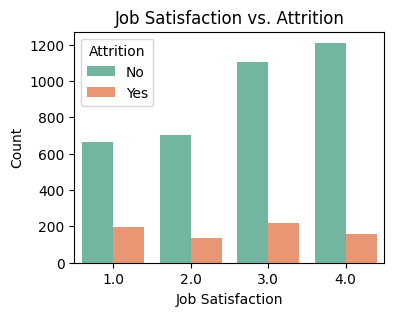

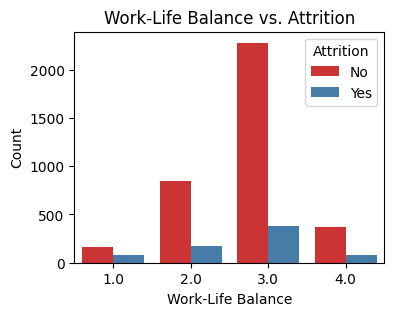

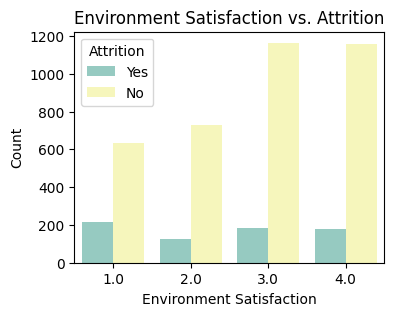

In [ ]:
#satisfaction levels vs Attrition
# Plot of job satisfaction vs. attrition
plt.figure(figsize=(4, 3))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data, palette='Set2')
plt.title('Job Satisfaction vs. Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

# Plot work-life balance vs. attrition
plt.figure(figsize=(4, 3))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data, palette='Set1')
plt.title('Work-Life Balance vs. Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

# Plot environment satisfaction vs. attrition
plt.figure(figsize=(4, 3))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data, palette='Set3')
plt.title('Environment Satisfaction vs. Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()


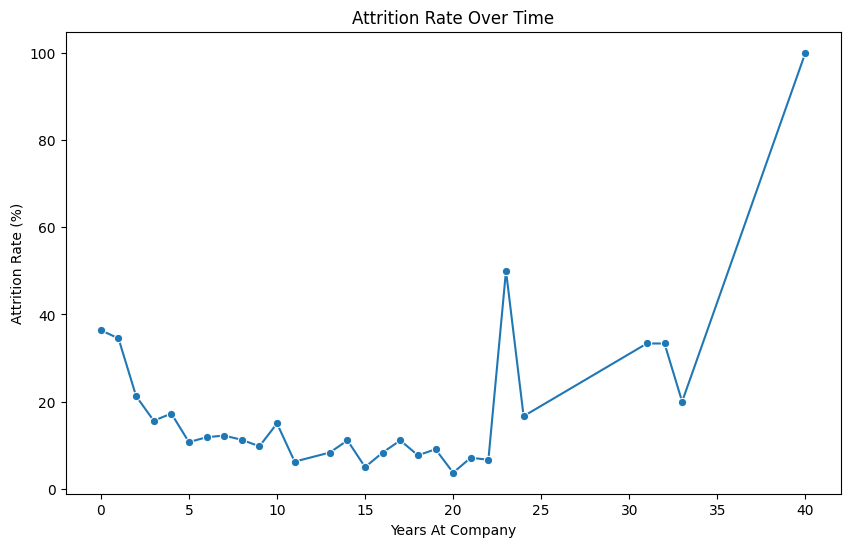

In [ ]:
#Attrition Rate Over Time
# Calculate attrition rate by year
attrition_by_year = data[data['Attrition'] == 'Yes'].groupby('YearsAtCompany')['EmployeeID'].count()
total_by_year = data.groupby('YearsAtCompany')['EmployeeID'].count()
attrition_rate_by_year = (attrition_by_year / total_by_year) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=attrition_rate_by_year.index, y=attrition_rate_by_year.values, marker='o')
plt.title('Attrition Rate Over Time')
plt.xlabel('Years At Company')
plt.ylabel('Attrition Rate (%)')
plt.show()

### **Thank You**